# Movielens Dataset Analaysis

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from os import path
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
os.chdir('/Users/Luecas/AnacondaProjects/recommender/Movielens')
data = pd.read_csv('./movielens/movies.csv')
data.shape

(27278, 3)

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## number of unique movies

In [4]:
#number of unique movies
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [5]:
ratings_data=pd.read_csv('./movielens/ratings.csv',sep=',')
ratings_data.shape

(20000263, 4)

In [6]:
ratings_data.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [7]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [8]:
ratings_data['rating'].mode() #calculating mode

0    4.0
dtype: float64

In [9]:
ratings_data['rating'].std() #calculating standard deviation

1.051988919275684

In [10]:
#minimum rating given to a movie
ratings_data['rating'].min()

0.5

In [11]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [12]:
#data cleaning
data.shape

(27278, 3)

In [13]:
#is any row null
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [14]:
ratings_data.shape

(20000263, 4)

In [16]:
#is any row null there
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [17]:
tags_data=pd.read_csv('./movielens/tags.csv',sep=',')
tags_data.shape

(465564, 4)

In [18]:
#is any row null in tags.csv
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [20]:
tags_data=tags_data.dropna()

In [21]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [22]:
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)

38643

### list of Horror movies

In [26]:
#list of Horror movies
horror_movies=data['genres'].str.contains('Horror')
data[horror_movies].head()

,movieId,title,genres
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
90,92,Mary Reilly (1996),Drama|Horror|Thriller
91,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance


In [27]:
#total number of horror movies
drama_movies.shape

(27278,)

### List of Comedy movies

In [28]:
#list of comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [29]:
#total no. of comedy movies
comedy_movies.shape

(27278,)

### List of movie_id by tag "fun"

In [31]:
#search movie id by tag search
tag_search = tags_data['tag'].str.contains('fun')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
152,129,4247,fuck you it's funny,1297144577
171,129,8528,funny,1297144703
222,129,80350,funny,1295299018
230,129,80549,funny dialogues,1295298933
372,342,1784,funny,1363544868


In [32]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [33]:
del ratings_data['timestamp']

In [34]:
#displays first 5 data from a dataframe
#here ratings.csv has 3 columns
ratings_data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [35]:
#displays first 5 data from a dataframe
#here movies.csv has 3 columns
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(12)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0


In [38]:
#movie rated high or not in boolean
high_rated= movie_data_ratings_data['rating']>4.0
print(high_rated)

0           False
1            True
2           False
3           False
4            True
5           False
6           False
7            True
8           False
9            True
10          False
11          False
12          False
13          False
14           True
15           True
16          False
17          False
18          False
19           True
20           True
21          False
22          False
23          False
24           True
25           True
26          False
27          False
28           True
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248     True
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

## List Highest lowest movie raters id

In [39]:
# high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [40]:
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [41]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1342

## top most rated movies

In [43]:
#top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(40)

title
Pulp Fiction (1994)                                                               67310
Forrest Gump (1994)                                                               66172
Shawshank Redemption, The (1994)                                                  63366
Silence of the Lambs, The (1991)                                                  63299
Jurassic Park (1993)                                                              59715
Star Wars: Episode IV - A New Hope (1977)                                         54502
Braveheart (1995)                                                                 53769
Terminator 2: Judgment Day (1991)                                                 52244
Matrix, The (1999)                                                                51334
Schindler's List (1993)                                                           50054
Toy Story (1995)                                                                  49695
Fugitive, The (1993)      

In [44]:
#slicing out columns to display only title and genres columns
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [46]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(15)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


In [49]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [50]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [51]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

## Popular Genres

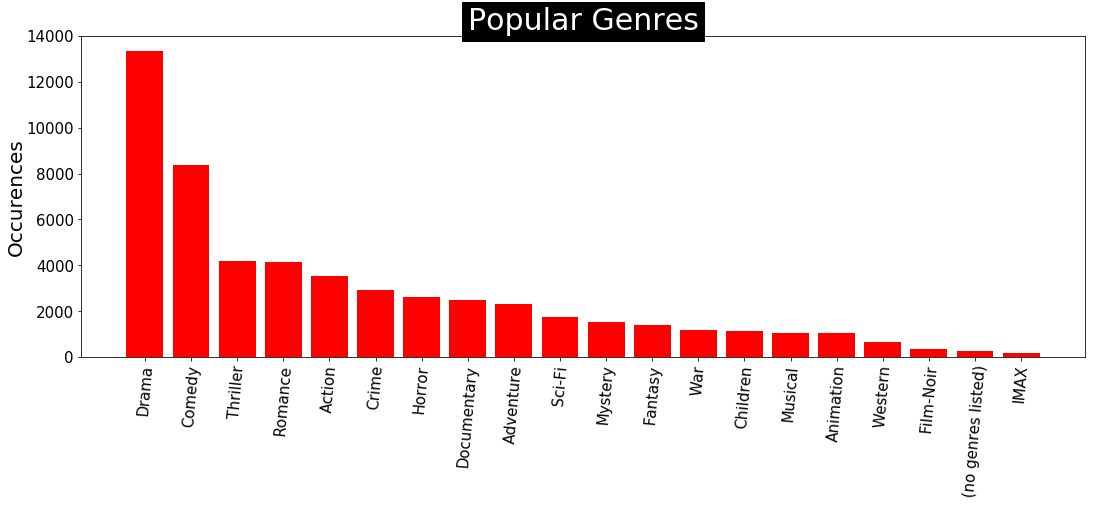

In [56]:
# lets display this in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Occurences", fontsize = 20, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popular Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()